In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')


# Explore Data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.duplicated().sum()

0

# Analysis 

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
 df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
df.nunique().sort_values()

Outcome                       2
Pregnancies                  17
BloodPressure                47
SkinThickness                51
Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64

In [11]:
 df['Pregnancies'][df['Age']==df['Age'].max()]


459    9
Name: Pregnancies, dtype: int64

In [12]:
df['Pregnancies'][df['Glucose']==df['Glucose'].max()]

661    1
Name: Pregnancies, dtype: int64

# Visualization

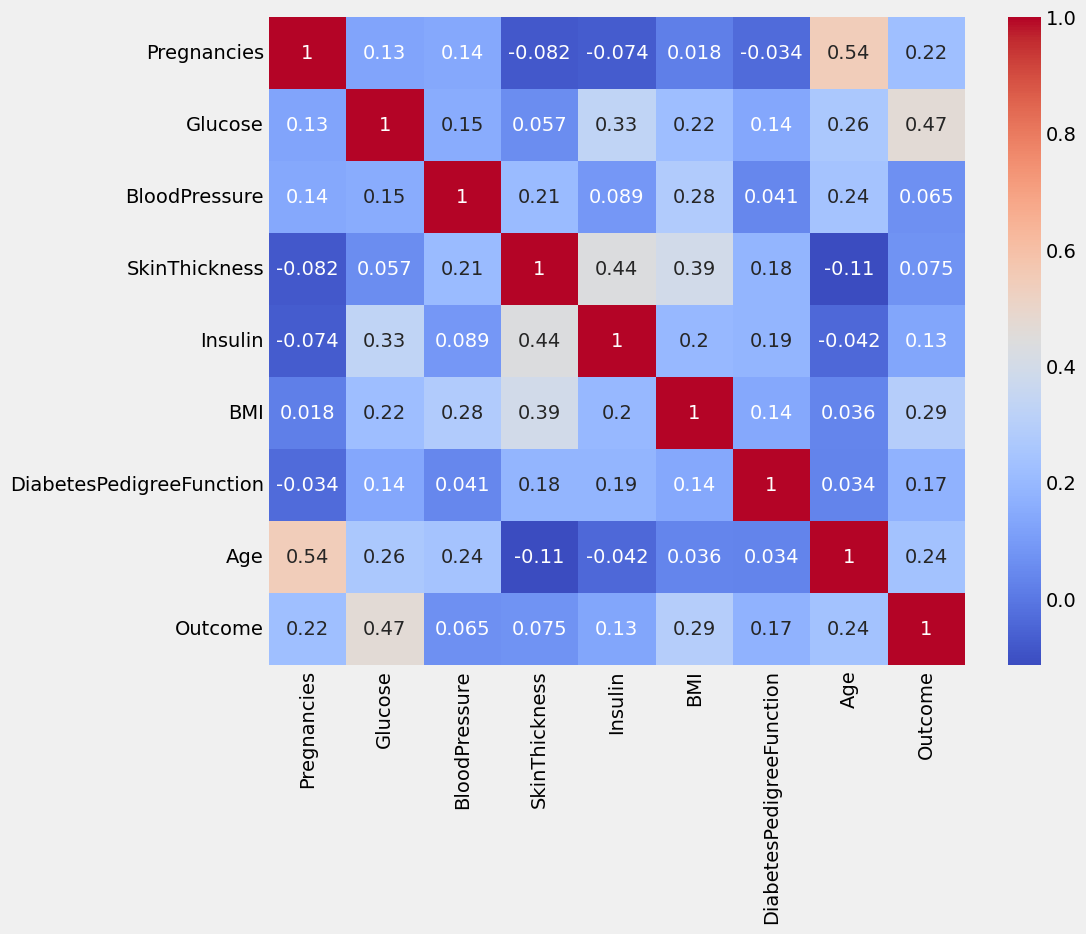

In [13]:
continuous_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[continuous_cols].corr()
plt.figure(figsize=(10,8)) # size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

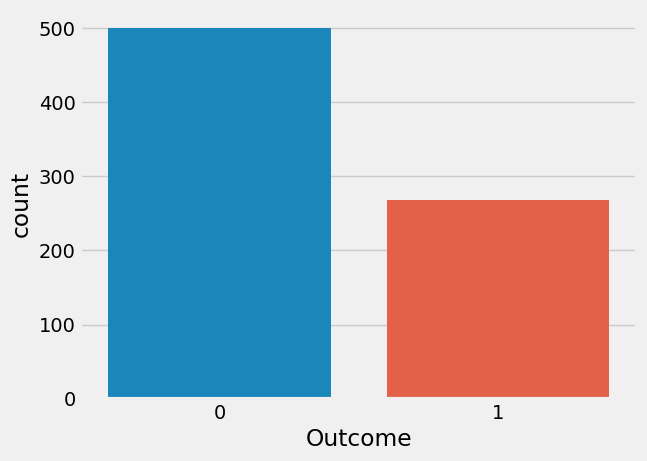

In [14]:
sns.countplot(x='Outcome',data=df)

<Axes: title={'center': 'Box plot'}, ylabel='Pregnancies'>

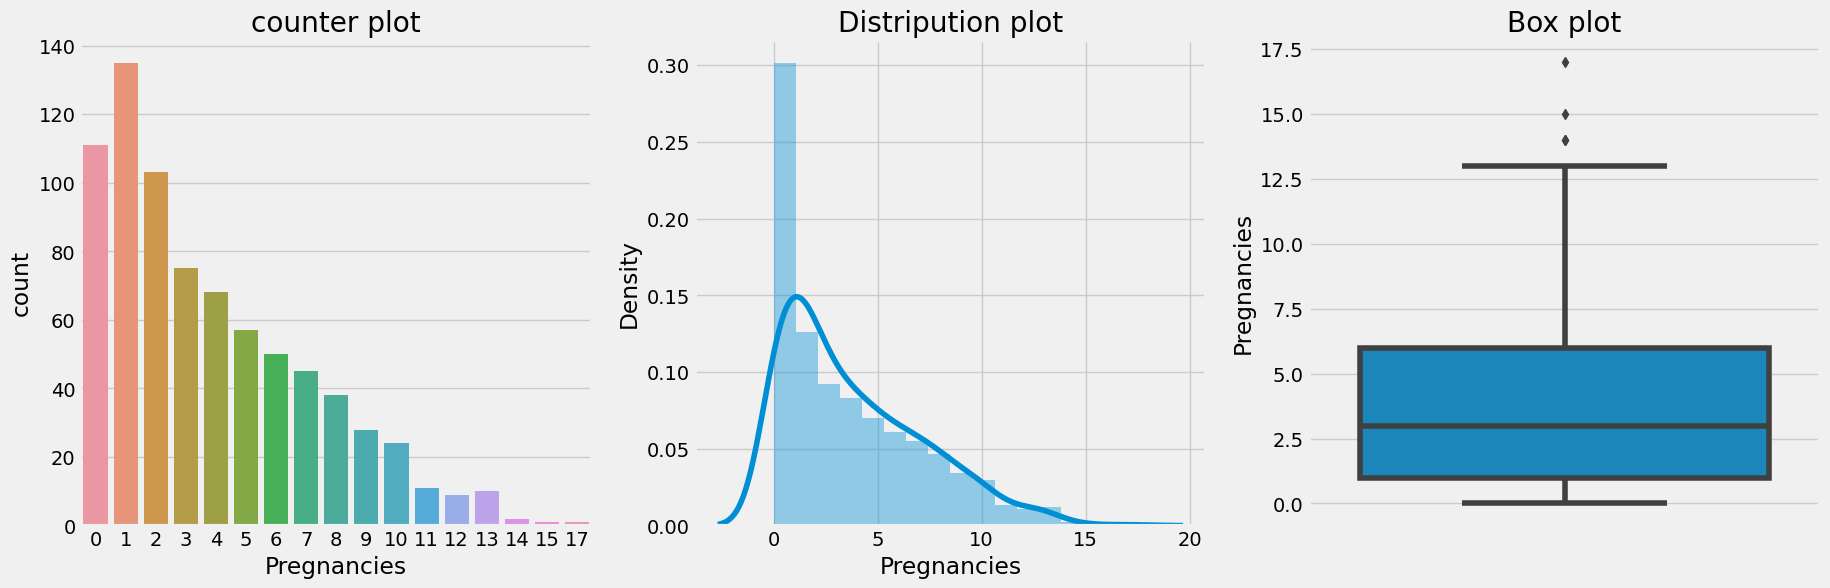

In [15]:
plt.figure(figsize =(20,6))
plt.subplot (1,3,1)
plt.title('counter plot')
sns.countplot(x='Pregnancies',data= df)

plt.subplot (1,3,2)
plt.title('Distripution plot')
sns.distplot(df['Pregnancies'] )

plt.subplot (1,3,3)
plt.title('Box plot')
sns.boxplot(y=df['Pregnancies'])

<Axes: >

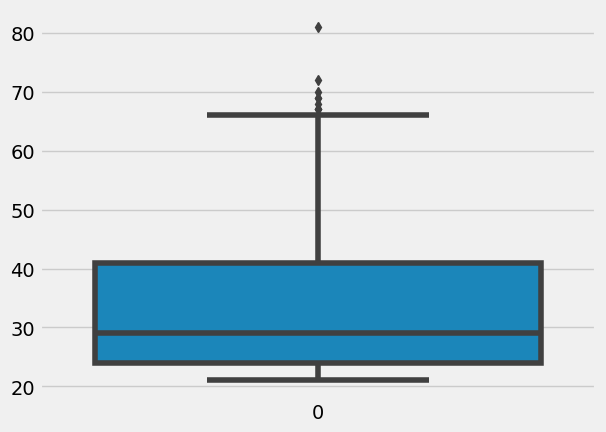

In [16]:
sns.boxplot(df.Age)

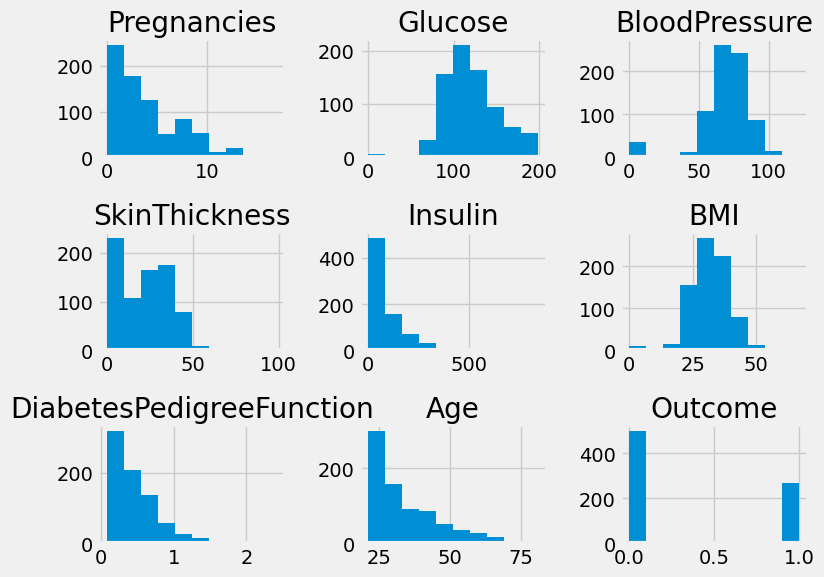

In [17]:
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

# Create Model

In [18]:
x=df.drop('Outcome', axis=1)
y= df['Outcome']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

# Logistic Regression Model

In [20]:
model1 = LogisticRegression()

In [21]:
model1.fit(x_train,y_train)

LogisticRegression()

In [22]:
# Predict on the test set
m1 = model1.predict(x_test)
m1

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [23]:
 model1.score(x,y)

0.7760416666666666

In [24]:
model1.coef_

array([[ 1.30545488e-01,  3.54051718e-02, -1.04968094e-02,
        -1.18369049e-03, -2.23388860e-03,  8.01201638e-02,
         1.27882193e+00,  1.17227935e-02]])

In [25]:
model1.intercept_

array([-8.28471284])

In [26]:
# Calculate the accuracy score using the predicted and actual test labels
accuracy = accuracy_score(y_test, m1)
recall = recall_score(y_test, m1)
f1 = f1_score(y_test, m1)


In [27]:
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7467532467532467
Recall: 0.5423728813559322
F1 Score: 0.6213592233009708


In [28]:
# Generate and print classification report
class_report = classification_report(y_test, m1)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        95
           1       0.73      0.54      0.62        59

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [29]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, m1)


In [30]:
conf_matrix

array([[83, 12],
       [27, 32]])

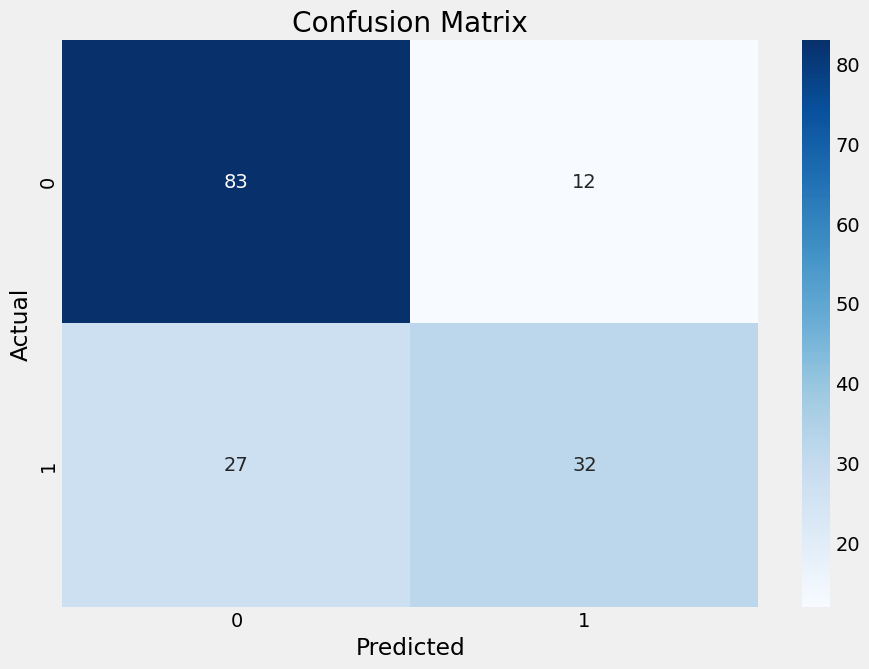

LogisticRegression()
accuracy is: 0.7467532467532467 recall is: 0.5423728813559322 f1 is: 0.6213592233009708


In [31]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(model1)
print("accuracy is:",accuracy , "recall is:",recall, "f1 is:", f1)

# SVM Model

In [32]:
model2 = SVC()

In [33]:
model2.fit(x_train,y_train)

SVC()

In [34]:
# Predict on the test set
m2 = model2.predict(x_test)
m2

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [35]:
 model2.score(x,y)

0.7682291666666666

In [36]:
# Calculate the accuracy score using the predicted and actual test labels
accuracy2 = accuracy_score(y_test, m2)
recall2 = recall_score(y_test, m2)
f12 = f1_score(y_test, m2)


In [37]:
print("Accuracy:", accuracy2)
print("Recall:", recall2)
print("F1 Score:", f12)

Accuracy: 0.7272727272727273
Recall: 0.423728813559322
F1 Score: 0.5434782608695652


In [38]:
# Generate and print classification report
class_report2 = classification_report(y_test, m2)
print("\nClassification Report:")
print(class_report2)


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        95
           1       0.76      0.42      0.54        59

    accuracy                           0.73       154
   macro avg       0.74      0.67      0.67       154
weighted avg       0.73      0.73      0.71       154



In [39]:
# Confusion matrix
conf_matrix2 = confusion_matrix(y_test, m2)
conf_matrix2

array([[87,  8],
       [34, 25]])

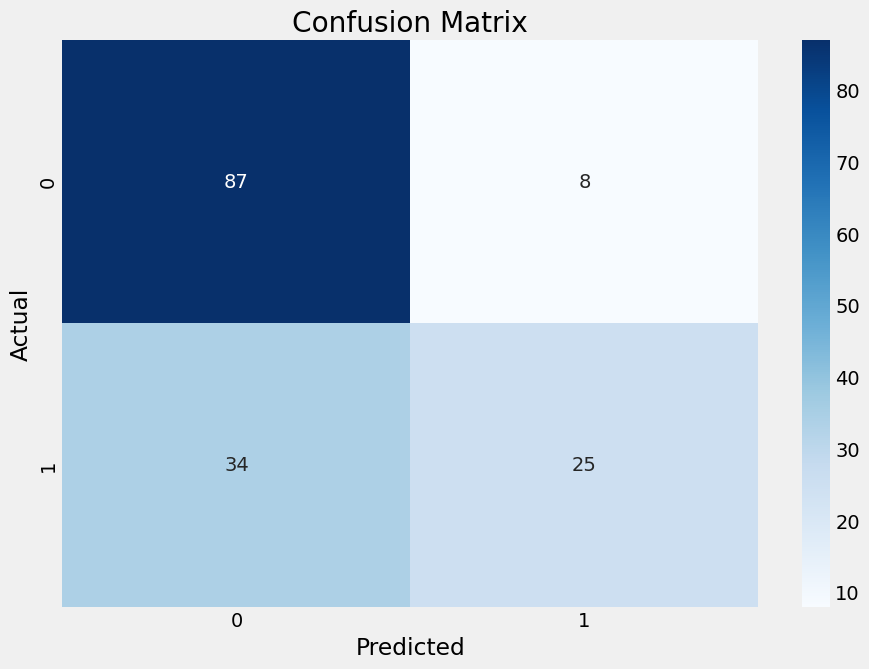

SVC()
accuracy is: 0.7272727272727273 recall is: 0.423728813559322 f1 is: 0.5434782608695652


In [40]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(model2)
print("accuracy is:",accuracy2 , "recall is:",recall2, "f1 is:", f12)

# Random Forest Classifier Model

In [41]:
model3 = RandomForestClassifier()

In [42]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
# Predict on the test set
m3 = model3.predict(x_test)
m3

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [44]:
 model3.score(x,y)

0.9453125

In [45]:
# Calculate the accuracy score using the predicted and actual test labels
accuracy3 = accuracy_score(y_test, m3)
recall3 = recall_score(y_test, m3)
f13 = f1_score(y_test, m3)


In [46]:
print("Accuracy:", accuracy3)
print("Recall:", recall3)
print("F1 Score:", f13)

Accuracy: 0.7272727272727273
Recall: 0.5423728813559322
F1 Score: 0.6037735849056605


In [47]:
# Generate and print classification report
class_report3 = classification_report(y_test, m3)
print("\nClassification Report:")
print(class_report3)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        95
           1       0.68      0.54      0.60        59

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



In [48]:
# Confusion matrix
conf_matrix3 = confusion_matrix(y_test, m3)
conf_matrix3

array([[80, 15],
       [27, 32]])

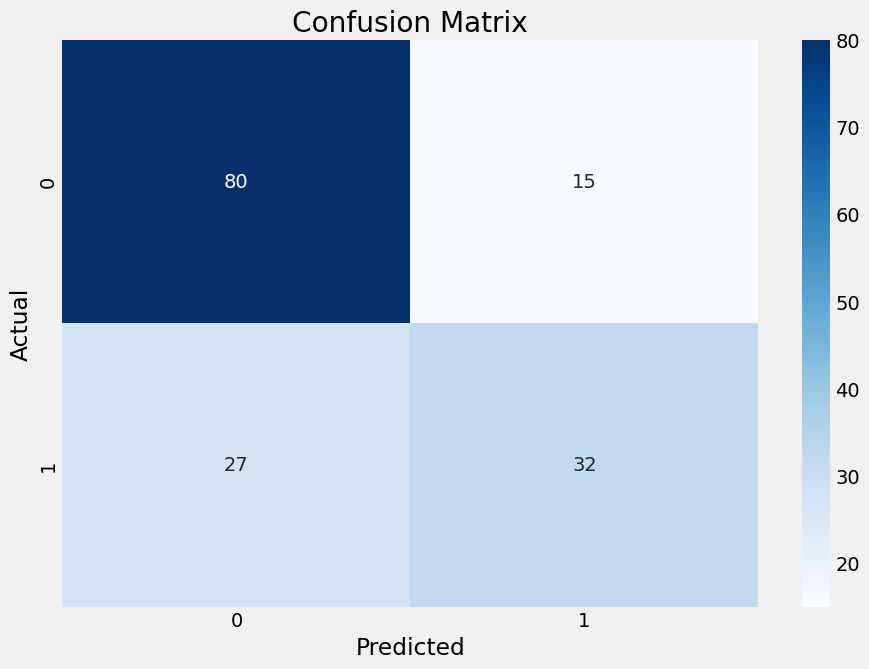

RandomForestClassifier()
accuracy is: 0.7272727272727273 recall is: 0.5423728813559322 f1 is: 0.6037735849056605


In [49]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(model3)
print("accuracy is:",accuracy3 , "recall is:",recall3, "f1 is:", f13)

# Gradient Boosting Classifier Model

In [50]:
model4 =GradientBoostingClassifier(n_estimators =1000)

In [51]:
model4.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=1000)

In [52]:
# Predict on the test set
m4 = model4.predict(x_test)
m4

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [53]:
 model4.score(x,y)

0.9427083333333334

In [54]:
# Calculate the accuracy score using the predicted and actual test labels
accuracy4 = accuracy_score(y_test, m4)
recall4 = recall_score(y_test, m4)
f14 = f1_score(y_test, m4)

In [55]:
print("Accuracy:", accuracy4)
print("Recall:", recall4)
print("F1 Score:", f14)

Accuracy: 0.7142857142857143
Recall: 0.6101694915254238
F1 Score: 0.6206896551724138


In [56]:
# Generate and print classification report
class_report4 = classification_report(y_test, m4)
print("\nClassification Report:")
print(class_report4)



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        95
           1       0.63      0.61      0.62        59

    accuracy                           0.71       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.71      0.71      0.71       154



In [57]:
# Confusion matrix
conf_matrix4 = confusion_matrix(y_test, m4)
conf_matrix4

array([[74, 21],
       [23, 36]])

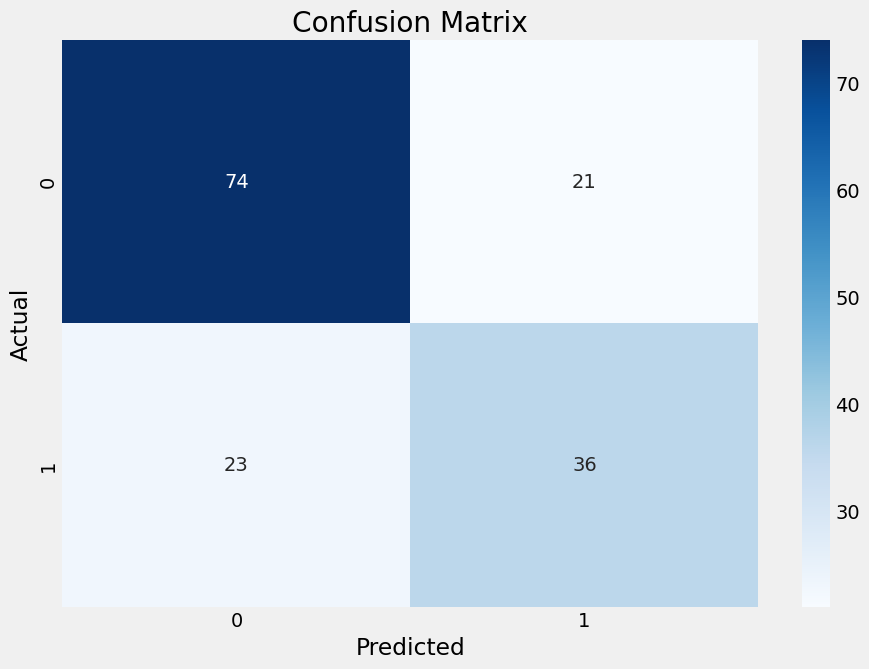

GradientBoostingClassifier(n_estimators=1000)
accuracy is: 0.7142857142857143 recall is: 0.6101694915254238 f1 is: 0.6206896551724138


In [58]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(model4)
print("accuracy is:",accuracy4 , "recall is:",recall4, "f1 is:", f14)